In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = pd.read_csv('movie_data.csv')

df = df.drop(columns='Rank')
df = df.dropna()

df.head()

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [42]:
def draw_hist(df, num_bins=20, title="Histogram", xlabel="", ylabel="", density=True, save=True, pdf=True):
    if pdf:
        mu = np.average(df)
        sigma = np.std(df)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma))
    
    num_bins = num_bins
    n, bins, patches = plt.hist(df, num_bins, facecolor='blue', alpha=0.5, density=density)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        plt.savefig(title + '.png')
    plt.show()


df_year = df['Year']
df_runtime = df['Runtime (Minutes)']
df_rating = df['Rating']
df_votes = df['Votes']
df_revenue = df['Revenue (Millions)']
df_metascore = df['Metascore']


# draw_hist(df_year, num_bins=40, title="Ilość filmów na dany rok", save=True, pdf=False, density=False)
# draw_hist(df_runtime, title="Czas trwania (Minuty)", save=True)
# draw_hist(df_rating, title="Oceny użytkowników", save=True)
# draw_hist(df_votes, num_bins=100, title="Liczba oddanych głosów", save=True, pdf=False, density=False)
# draw_hist(df_reveue, num_bins=100, title="Przychody (Miliony $)", save=True, pdf=False, density=False)
# draw_hist(df_metascore, title="Oceny krytyków", save=True)

## Scatter ploty w zależności on zysków filmu

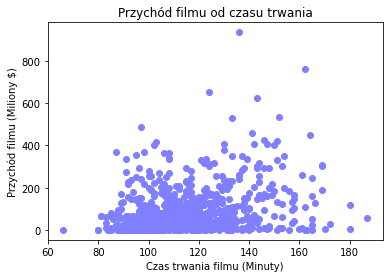

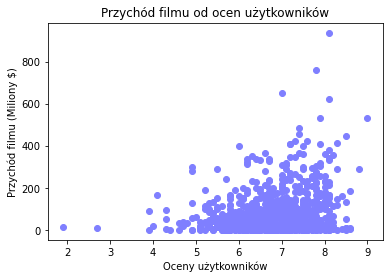

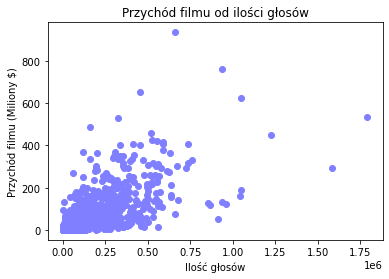

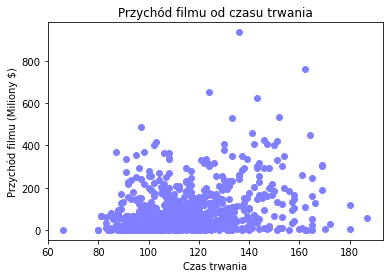

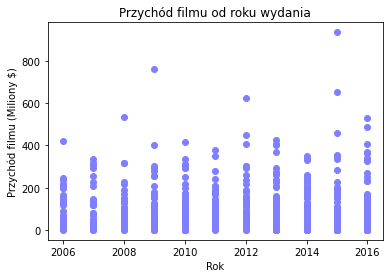

In [69]:
import os
# df_year = df['Year']
# df_runtime = df['Runtime (Minutes)']
# df_rating = df['Rating']
# df_votes = df['Votes']
# df_revenue = df['Revenue (Millions)']
# df_metascore = df['Metascore']

def plot_scatter(df_x, df_y, color, title, xlabel, ylabel, save=False, directory="scatters"):
    plt.scatter(df_x, df_y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if save:
        if not os.path.exists(directory):
            os.makedirs(directory)
        plt.savefig(directory + '/' + title + '.png')
    plt.show()
    

xlabel = "Czas trwania filmu (Minuty)"
ylabel = "Przychód filmu (Miliony $)"
title = "Przychód filmu od czasu trwania"
plot_scatter(df_runtime, df_revenue, title=title, xlabel=xlabel, ylabel=ylabel, color="#7f7fff", save=True)

xlabel = "Oceny użytkowników"
ylabel = "Przychód filmu (Miliony $)"
title = "Przychód filmu od ocen użytkowników"
plot_scatter(df_rating, df_revenue, title=title, xlabel=xlabel, ylabel=ylabel, color="#7f7fff", save=True)

xlabel = "Ilość głosów"
ylabel = "Przychód filmu (Miliony $)"
title = "Przychód filmu od ilości głosów"
plot_scatter(df_votes, df_revenue, title=title, xlabel=xlabel, ylabel=ylabel, color="#7f7fff", save=True)

xlabel = "Czas trwania"
ylabel = "Przychód filmu (Miliony $)"
title = "Przychód filmu od czasu trwania"
plot_scatter(df_runtime, df_revenue, title=title, xlabel=xlabel, ylabel=ylabel, color="#7f7fff", save=True)

xlabel = "Rok"
ylabel = "Przychód filmu (Miliony $)"
title = "Przychód filmu od roku wydania"
plot_scatter(df_year, df_revenue, title=title, xlabel=xlabel, ylabel=ylabel, color="#7f7fff", save=True)